In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
#Είδα ότι δεν είναι Normalized τα δεδομένα οπότε τα έκανα δεν ξέρω αν είναι σίγουρα καλύτερα έτσι θα δοκιμάσω
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.  

(60000, 28, 28)


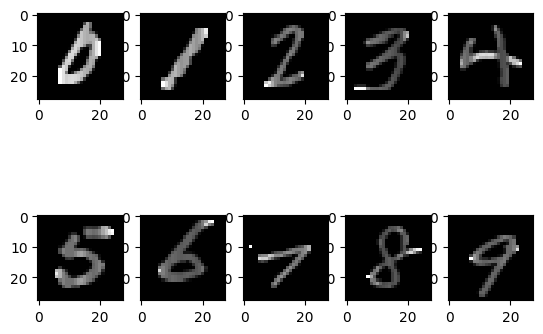

In [4]:
#Βλέπουμε όλες τις εικόνες και το μεγεθός τους 28*28 άρα είναι 784 Pixel και δεν παίζουν όλα τα pixel ρόλο αφού συνήθως όλοι γράφουν στο κέντρο της εικόνας οπότε θα δείξω παρακάτω
for i in range(10):
  indices = np.where(y_train == i)[0]
  plt.subplot(2, 5, i + 1)
  random_index = np.random.choice(indices)
  plt.imshow(x_train[random_index], cmap='gray')

print(x_train.shape)





In [5]:

#Υπάρχουν με μαθηματική βεβαιότητα 67 νεκρά Pixel πολύ πιθανόν και αυτά με την πολύ μικρή διακύμανση να είναι για να βγούν από το μοντέλο μας
important_pixels = np.var(x_train, axis=0)
not_important_pixels = np.sum(important_pixels == 0)
print("Number of pixels with high variance", len(important_pixels))
print("Number of pixels with 0 variance", not_important_pixels)

Number of pixels with high variance 28
Number of pixels with 0 variance 67


In [6]:
#Νομίζω έιναι είδη np arrays απλά δεν ήμουν σίγουρος
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
#Θέλει flattening αφού δεν είναι CNN
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

print(x_train_flat.shape)

(60000, 784)


Accuracy: 0.9616 (96.16%)
Accuracy: 0.9538 (95.38%)
Accuracy: 0.9421 (94.21%)
Accuracy: 0.9063 (90.63%)


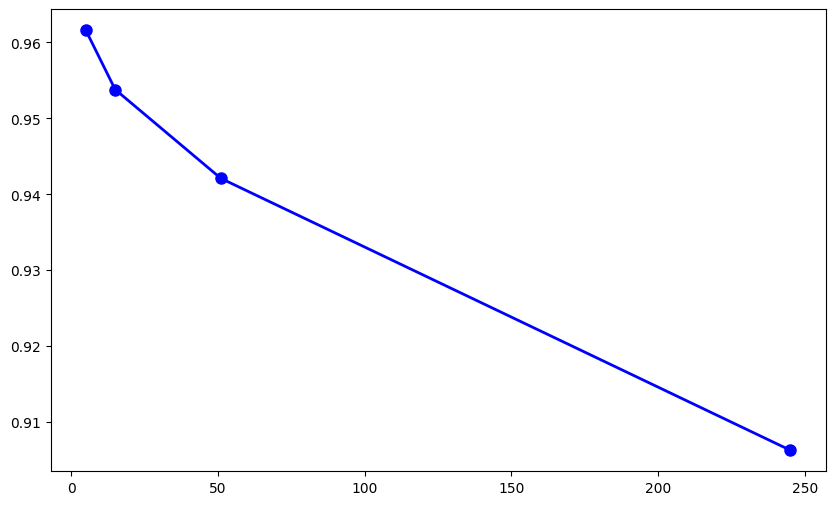

In [8]:
k=[5,15,51,245]
acc_val = []

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_flat, y_train)
  accuracy = knn.score(x_test_flat, y_test)
  acc_val.append(accuracy)
  print(f"Accuracy: {accuracy:.4f} ({(accuracy*100):.2f}%)")
plt.figure(figsize=(10, 6))
plt.plot(k, acc_val, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)



In [9]:
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(x_train_flat, y_train)

KNeighborsClassifier()

ο αριθμός είναι: 2


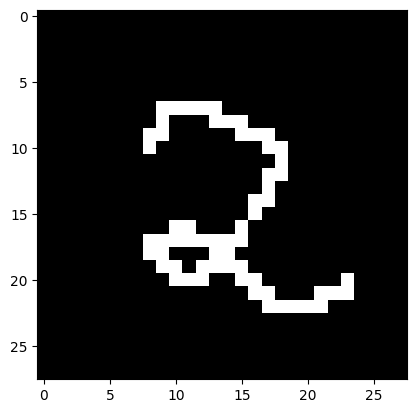

In [11]:
img = Image.open('MNIST.png').convert('L')
img_array = np.array(img)
img_ready = img_array / 255.0
img_flat = img_ready.reshape(1, 784)
prediction = best_knn.predict(img_flat)
plt.imshow(img_array, cmap='gray')
print(f"ο αριθμός είναι: {prediction[0]}")

Απάντηση στην ερώτηση 5 από την εργασία 6

In [12]:
from sklearn.preprocessing import StandardScaler
#Το scaling δεν λειτουργέι σε normalized data άρα απο την αρχή
(x_train_6, y_train_6), (x_test_6, y_test_6) = mnist.load_data()
x_train_6_flat = x_train_6.reshape(60000, 784)
x_test_6_flat = x_test_6.reshape(10000, 784)

print(x_train_6_flat.shape)
scaler = StandardScaler()
X_train_6_scaled = scaler.fit_transform(x_train_6_flat)
X_test_6_scaled = scaler.transform(x_test_6_flat)


(60000, 784)


In [13]:
from sklearn.decomposition import PCA
# προσοχή αν κάνω fit στο test set θα δημιουργηθεί data leakage
pca = PCA(n_components=300)
X_train_6_pca = pca.fit_transform(X_train_6_scaled)
X_test_6_pca = pca.transform(X_test_6_scaled)


Accuracy: 0.9497 (94.97%)
Accuracy: 0.9436 (94.36%)
Accuracy: 0.9273 (92.73%)
Accuracy: 0.9158 (91.58%)


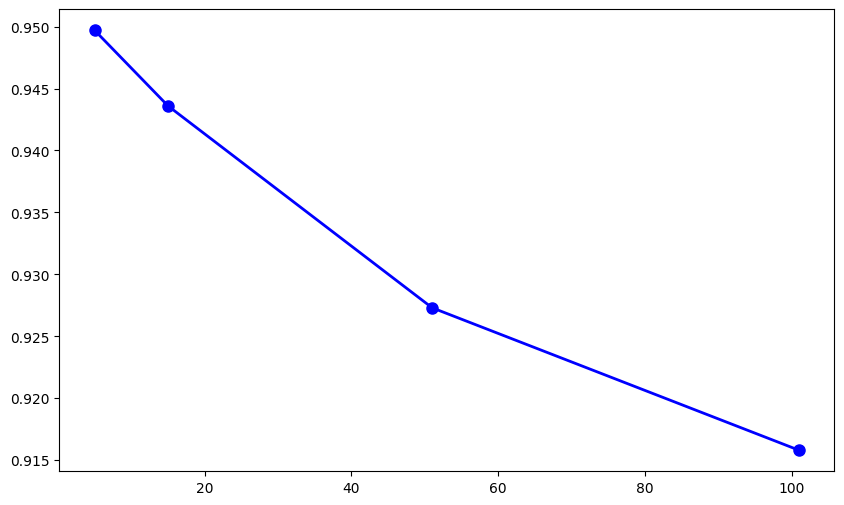

In [14]:
k=[5,15,51,101]
acc_val = []

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_6_pca, y_train_6)
  accuracy = knn.score(X_test_6_pca, y_test_6)
  acc_val.append(accuracy)
  print(f"Accuracy: {accuracy:.4f} ({(accuracy*100):.2f}%)")
plt.figure(figsize=(10, 6))
plt.plot(k, acc_val, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

διαφορετικοί PCA άξονες για κάθε σύνολο, άρα το train και το test προβάλλονται σε διαφορετικούς χώρους αν κάνουμε fit ξεχωριστά αν κάνουμε μαζί θα χρησιμοποιήσει στατιστικές πληροφορίες από το test set που θεωρείται data leakage

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_6_lda = lda.fit_transform(X_train_6_scaled, y_train_6)
X_test_6_lda = lda.transform(X_test_6_scaled)

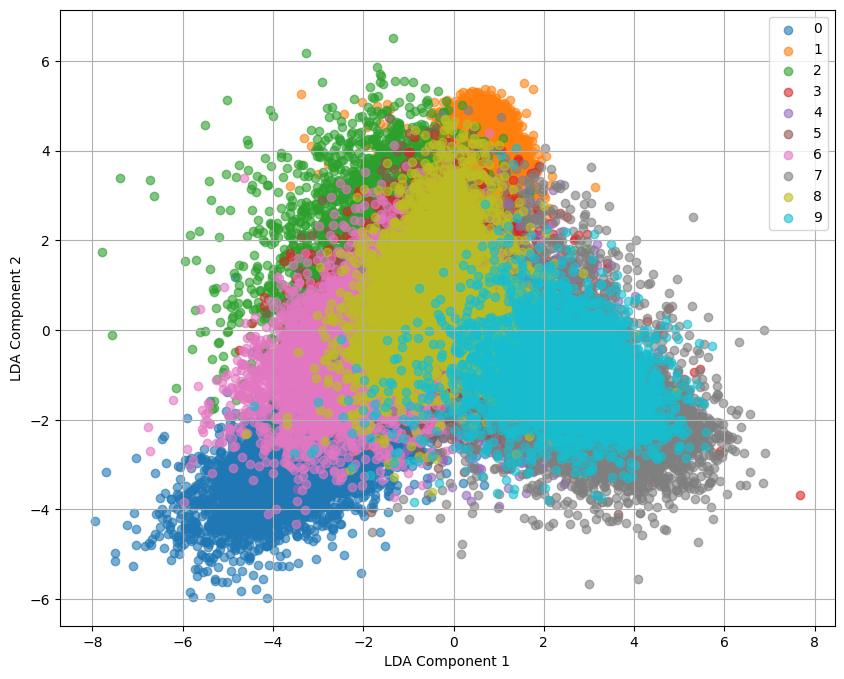

In [16]:


plt.figure(figsize=(10, 8))

for digit in range(10):
    mask = (y_train_6 == digit)
    plt.scatter(X_train_6_lda[mask, 0], X_train_6_lda[mask, 1],
                label=str(digit), alpha=0.6)

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.grid(True)
plt.show()

Η LDA σε δύο διαστάσεις επιτυγχάνει μερικώς αλλά όχι πλήρη διαχωρισμό υπάρχει πολύ overlapping αφου προσπαθούμε να χωρίσουμε 9 κλάσεις σε 2 διαστασεις.

In [17]:
!pip install umap-learn

In [18]:
import umap
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_train_6_umap = reducer.fit_transform(X_train_6_scaled)
X_test_6_umap = reducer.transform(X_test_6_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


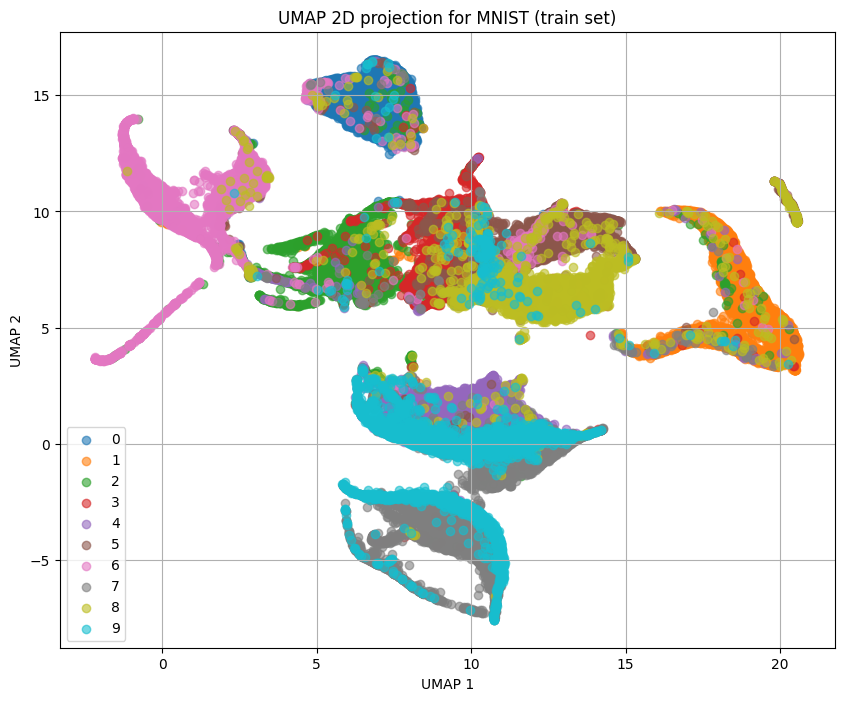

In [19]:
plt.figure(figsize=(10, 8))

for digit in range(10):
    mask = (y_train_6 == digit)
    plt.scatter(
        X_train_6_umap[mask, 0],
        X_train_6_umap[mask, 1],
        label=str(digit),
        alpha=0.6
    )

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP 2D projection for MNIST (train set)")
plt.legend()
plt.grid(True)
plt.show()

η UMAP, επειδή είναι μη γραμμική καταφέρνει να αποτυπώσει καλύτερα τη δομή των δεδομένων σε χαμηλή διάσταση. Παρόλα αυτά όταν έχουμε τόσες χιλιάδες σημεία η αποτύπωση σε 2 διαστάσεις είναι πολύ δύσκολη διαδικασία.